[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.11 0.12 0.13 0.14 0.15
 0.16 0.17 0.18 0.19 0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29 0.31
 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.41 0.42 0.43 0.44 0.45 0.46
 0.47 0.48 0.49 0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.61 0.62
 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.71 0.72 0.73 0.74 0.75 0.76 0.77
 0.78 0.79 0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.91 0.92 0.93
 0.94 0.95 0.96 0.97 0.98 0.99 1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08
 1.09 1.11 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.21 1.22 1.23 1.24
 1.25 1.26 1.27 1.28 1.29 1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39
 1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.51 1.52 1.53 1.54 1.55
 1.56 1.57 1.58 1.59 1.61 1.62 1.63 1.64 1.65 1.66 1.67 1.68 1.69 1.71
 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.81 1.82 1.83 1.84 1.85 1.86
 1.87 1.88 1.89 1.91 1.92 1.93 1.94 1.95 1.96 1.97 1.98 1.99 2.01 2.02
 2.03 2.04 2.05 2.06 2.07 2.08 2.09 2.11 2.12 2.13 2.14 2.15 2.16 2.17
 2.18 

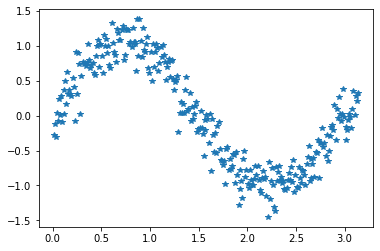

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats 
#from preamble import * 
%matplotlib inline
data = pd.read_csv(r"C:\ML_work\trainRegression.csv")
data.head()

x= np.array(data["X"])
y= np.array(data["R"])
print(x)
print(y)

plt.plot(data["X"],data["R"],"*")




A:  [[283.     444.95  ]
 [444.95   932.7465]]

Y:  [[   1.39087  ]
 [-126.6414295]]
Ainv:  [[ 0.01413536 -0.00674302]
 [-0.00674302  0.00428874]]

X:  [[ 0.8736061 ]
 [-0.55251074]]


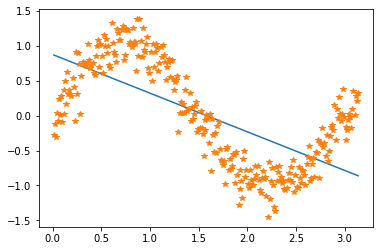

mean squared error of linear regression model 
0.29907275382945003


In [24]:
from sklearn.metrics import mean_squared_error
N= np.size(x)
sx=x.sum()
sq= np.square(x)
sqx=sq.sum()
A = np.array([[N,sx],[sx,sqx]])
print ("A: ", A)

print()
sy= y.sum()
yx= x*y
syx=yx.sum()
Y=np.array([[sy], [syx]])
print("Y: ", Y)

Ainv=np.linalg.inv(A)
print ("Ainv: ",Ainv)
X = np.dot(Ainv, Y)
print()
print("X: ", X)

def eqfunc(trainx):
    return X[1] * trainx + X[0]

linmodel = list(map(eqfunc, x))
plt.plot(x, linmodel)
plt.plot(x,y,"*")
plt.show()

msqerr = mean_squared_error(y, eqfunc(x))
print ("mean squared error of linear regression model ")
print(msqerr)



A:  [[ 283.          444.95        932.7465    ]
 [ 444.95        932.7465     2199.781025  ]
 [ 932.7465     2199.781025   5533.85257677]]

Y:  [[   1.39087   ]
 [-126.6414295 ]
 [-378.87568955]]
Ainv:  [[ 0.03181932 -0.04047862  0.01072756]
 [-0.04047862  0.06864599 -0.02046492]
 [ 0.01072756 -0.02046492  0.00650763]]

X:  [[ 1.10611454]
 [-0.99606599]
 [ 0.14104585]]


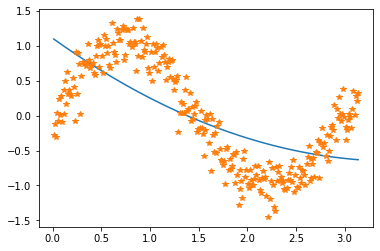

mean squared error of quadratic regression model 
0.2882705703732302


In [28]:
N= np.size(x)
sx=x.sum()
sq= np.square(x)
sqx=sq.sum()
cube=np.power(x,3)
cubex=cube.sum()
quad=np.power(x,4)
quadx=quad.sum()

A = np.array([[N,sx,sqx],[sx,sqx,cubex],[sqx,cubex,quadx]])
print ("A: ", A)

print()
sy= y.sum()
yx= x*y
syx = yx.sum()
ysqx = sq*y
sumysqx= ysqx.sum()
Y=np.array([[sy], [syx],[sumysqx]])
print("Y: ", Y)

Ainv=np.linalg.inv(A)
print ("Ainv: ",Ainv)
X = np.dot(Ainv, Y)
print()
print("X: ", X)


def eqfunc2(trainx):
    sq_trainx= np.square(trainx)
    return X[2] * sq_trainx + X[1] * trainx + X[0]

linmodel = list(map(eqfunc2, x))
plt.plot(x, linmodel)
plt.plot(x,y,"*")
plt.show()

msqerr = mean_squared_error(y, eqfunc2(x))
print ("mean squared error of quadratic regression model ")
print(msqerr)


A:  [[  283.           444.95         932.7465      2199.781025  ]
 [  444.95         932.7465      2199.781025    5533.85257677]
 [  932.7465      2199.781025    5533.85257677 14501.33829628]
 [ 2199.781025    5533.85257677 14501.33829628 39086.48841058]]

Y:  [[   1.39087   ]
 [-126.6414295 ]
 [-378.87568955]
 [-952.32410353]]
Ainv:  [[ 0.05664436 -0.13513534  0.08595689 -0.01594607]
 [-0.13513534  0.4295675  -0.30731072  0.06080162]
 [ 0.08595689 -0.30731072  0.23448106 -0.04832266]
 [-0.01594607  0.06080162 -0.04832266  0.01024277]]

X:  [[-0.18862637]
 [ 3.94071895]
 [-3.78251095]
 [ 0.83166145]]


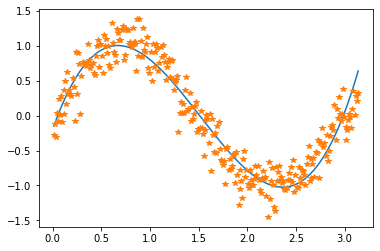

mean squared error of cubic regression model 
0.049660255362215605


In [29]:
N= np.size(x)
sx=x.sum()
sq= np.square(x)
sqx=sq.sum()
cube=np.power(x,3)
cubex=cube.sum()
quad=np.power(x,4)
quadx=quad.sum()
penta=np.power(x,5)
pentax=penta.sum()
hexa=np.power(x,6)
hexax=hexa.sum()

A = np.array([[N,sx,sqx,cubex],[sx,sqx,cubex,quadx],[sqx,cubex,quadx,pentax],[cubex,quadx,pentax,hexax]])
print ("A: ", A)

print()
sy= y.sum()
yx= x*y
syx = yx.sum()
ysqx = sq*y
sumysqx= ysqx.sum()
ycubex= cube * y
sumycubex= ycubex.sum()
Y=np.array([[sy], [syx],[sumysqx],[sumycubex]])
print("Y: ", Y)

Ainv=np.linalg.inv(A)
print ("Ainv: ",Ainv)
X = np.dot(Ainv, Y)
print()
print("X: ", X)


def eqfunc3(trainx):
    sq_trainx = np.square(trainx)
    cube_trainx = np.power(trainx,3)
    return X[3]*cube_trainx + X[2] * sq_trainx + X[1] * trainx + X[0]

linmodel = list(map(eqfunc3, x))
plt.plot(x, linmodel)
plt.plot(x,y,"*")
plt.show()

msqerr = mean_squared_error(y, eqfunc3(x))
print ("mean squared error of cubic regression model ")
print(msqerr)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1]
[-0.226  -0.174   0.459   0.638   0.869   0.665   0.745   1.25    0.929
  0.946   1.01    0.928   0.586   0.704  -0.0383 -0.156  -0.339  -0.0542
 -0.628  -0.985  -0.595  -0.698  -1.17   -1.18   -0.982  -1.14   -0.605
 -0.85   -0.404   0.0864 -0.464   0.142 ]


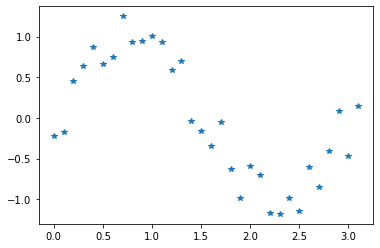

In [35]:
data = pd.read_csv(r"C:\ML_work\testRegression.csv")
data.head()

testx= np.array(data["X"])
testy= np.array(data["R"])
print(testx)
print(testy)

plt.plot(data["X"],data["R"],"*")

A:  [[283.     444.95  ]
 [444.95   932.7465]]

Y:  [[   1.39087  ]
 [-126.6414295]]
Ainv:  [[ 0.01413536 -0.00674302]
 [-0.00674302  0.00428874]]

X:  [[ 0.8736061 ]
 [-0.55251074]]


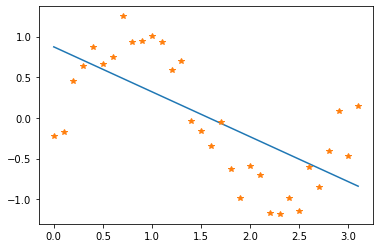

mean squared error of linear regression model 
0.3159321720459774


In [36]:
from sklearn.metrics import mean_squared_error
N= np.size(x)
sx=x.sum()
sq= np.square(x)
sqx=sq.sum()
A = np.array([[N,sx],[sx,sqx]])
print ("A: ", A)

print()
sy= y.sum()
yx= x*y
syx=yx.sum()
Y=np.array([[sy], [syx]])
print("Y: ", Y)

Ainv=np.linalg.inv(A)
print ("Ainv: ",Ainv)
X = np.dot(Ainv, Y)
print()
print("X: ", X) #using training data parameters of gradient(s) and y intercept

def eqfunc(trainx):
    return X[1] * trainx + X[0]

linmodel = list(map(eqfunc, testx))
plt.plot(testx, linmodel)
plt.plot(testx,testy,"*")
plt.show()

msqerr = mean_squared_error(testy, eqfunc(testx))
print ("mean squared error of linear regression model ")# mean square error of test data with predicted data calculated using traing data
print(msqerr)

A:  [[ 283.          444.95        932.7465    ]
 [ 444.95        932.7465     2199.781025  ]
 [ 932.7465     2199.781025   5533.85257677]]

Y:  [[   1.39087   ]
 [-126.6414295 ]
 [-378.87568955]]
Ainv:  [[ 0.03181932 -0.04047862  0.01072756]
 [-0.04047862  0.06864599 -0.02046492]
 [ 0.01072756 -0.02046492  0.00650763]]

X:  [[ 1.10611454]
 [-0.99606599]
 [ 0.14104585]]


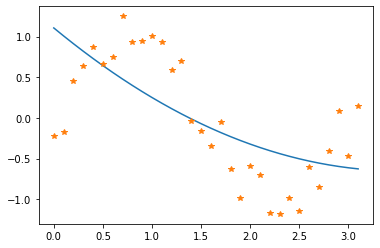

mean squared error of quadratic regression model 
0.32604179594962823


In [37]:
N= np.size(x)
sx=x.sum()
sq= np.square(x)
sqx=sq.sum()
cube=np.power(x,3)
cubex=cube.sum()
quad=np.power(x,4)
quadx=quad.sum()

A = np.array([[N,sx,sqx],[sx,sqx,cubex],[sqx,cubex,quadx]])
print ("A: ", A)

print()
sy= y.sum()
yx= x*y
syx = yx.sum()
ysqx = sq*y
sumysqx= ysqx.sum()
Y=np.array([[sy], [syx],[sumysqx]])
print("Y: ", Y)

Ainv=np.linalg.inv(A)
print ("Ainv: ",Ainv)
X = np.dot(Ainv, Y)
print()
print("X: ", X) #using training data parameters of gradient(s) and y intercept

def eqfunc2(trainx):
    sq_trainx= np.square(trainx)
    return X[2] * sq_trainx + X[1] * trainx + X[0]

linmodel = list(map(eqfunc2, testx))
plt.plot(testx, linmodel)
plt.plot(testx,testy,"*")
plt.show()

msqerr = mean_squared_error(testy, eqfunc2(testx))
print ("mean squared error of quadratic regression model ")# mean square error of test data with predicted data calculated using training data
print(msqerr)


A:  [[  283.           444.95         932.7465      2199.781025  ]
 [  444.95         932.7465      2199.781025    5533.85257677]
 [  932.7465      2199.781025    5533.85257677 14501.33829628]
 [ 2199.781025    5533.85257677 14501.33829628 39086.48841058]]

Y:  [[   1.39087   ]
 [-126.6414295 ]
 [-378.87568955]
 [-952.32410353]]
Ainv:  [[ 0.05664436 -0.13513534  0.08595689 -0.01594607]
 [-0.13513534  0.4295675  -0.30731072  0.06080162]
 [ 0.08595689 -0.30731072  0.23448106 -0.04832266]
 [-0.01594607  0.06080162 -0.04832266  0.01024277]]

X:  [[-0.18862637]
 [ 3.94071895]
 [-3.78251095]
 [ 0.83166145]]


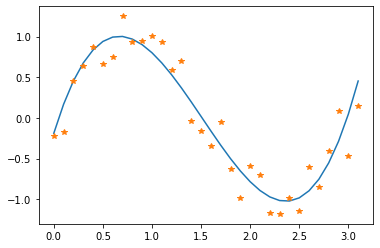

mean squared error of cubic regression model 
0.05154205769094655


In [38]:
N= np.size(x)
sx=x.sum()
sq= np.square(x)
sqx=sq.sum()
cube=np.power(x,3)
cubex=cube.sum()
quad=np.power(x,4)
quadx=quad.sum()
penta=np.power(x,5)
pentax=penta.sum()
hexa=np.power(x,6)
hexax=hexa.sum()

A = np.array([[N,sx,sqx,cubex],[sx,sqx,cubex,quadx],[sqx,cubex,quadx,pentax],[cubex,quadx,pentax,hexax]])
print ("A: ", A)

print()
sy= y.sum()
yx= x*y
syx = yx.sum()
ysqx = sq*y
sumysqx= ysqx.sum()
ycubex= cube * y
sumycubex= ycubex.sum()
Y=np.array([[sy], [syx],[sumysqx],[sumycubex]])
print("Y: ", Y)

Ainv=np.linalg.inv(A)
print ("Ainv: ",Ainv)
X = np.dot(Ainv, Y)
print()
print("X: ", X)#using training data parameters of gradient(s) and y intercept



def eqfunc3(trainx):
    sq_trainx = np.square(trainx)
    cube_trainx = np.power(trainx,3)
    return X[3]*cube_trainx + X[2] * sq_trainx + X[1] * trainx + X[0]

linmodel = list(map(eqfunc3, testx))
plt.plot(testx, linmodel)
plt.plot(testx,testy,"*")
plt.show()

msqerr = mean_squared_error(testy, eqfunc3(testx))
print ("mean squared error of cubic regression model ")# mean square error of test data with predicted data calculated using training data
print(msqerr)

In [39]:
print("Results:")
print("higher the degree of the formula to compute predicted results lower the mean square error")
print("parameters of training data can be efficiently used on the testing data")

Results:
higher the degree of the formula to compute predicted results lower the mean square error
parameters of training data can be efficiently used on the testing data
